# Project-Melbourn housing Price Prediction 

In [1]:
#Importing all required libraries
import numpy as np#Linear algebra
import pandas as pd#Data processing,CSV file(read)
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from time import time
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree  import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
#imported melbourn house price dataset
df=pd.read_csv("C:\\Users\\PankajR\\Desktop\\Maxgen Tech\\dddddd\\Housing Price Prediction (2)\\Housing Price Prediction\\cleaned_melbourn_housing_data.csv")

In [3]:
df.head() # first 5 rows of dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,1,1,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,1,0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,2,0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,2,1,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,1,2,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


### EDA (Exploratory Data Analysis)

##### In this step we check whether data contain null or missing values. What is the size of the data. What is the datatype of each column. What are unique values of categorical variables etc

In [4]:
df.shape

(20312, 18)

In [5]:
df.isnull().sum().any() # Null value check

False

##### To get better understanding about this dataset, I summaried all importabt variables in terms of minimum, first quartile, median, mean, third quantile and maximum value

In [6]:
df.describe() # short summary

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,20312.000000,2.031200e+04,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000,20312.000000
mean,3.067743,1.089994e+06,11.413283,3114.165961,1.596642,1.715242,597.812746,-37.806890,144.997336,7521.028358
std,0.944962,6.556246e+05,6.785729,114.554795,0.703154,0.992487,535.083347,0.091806,0.120199,4404.138049
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,14.000000,-38.190430,144.423790,121.000000
25%,2.000000,6.570000e+05,6.600000,3046.000000,1.000000,1.000000,308.000000,-37.861300,144.925048,4385.000000
50%,3.000000,9.100000e+05,10.500000,3087.000000,1.000000,2.000000,567.000000,-37.799700,145.004500,6567.000000
75%,4.000000,1.333250e+06,14.200000,3152.000000,2.000000,2.000000,696.000000,-37.748000,145.069500,10331.000000
max,16.000000,1.120000e+07,48.100000,3977.000000,9.000000,18.000000,9838.000000,-37.397800,145.526350,21650.000000


In [7]:
a=df.corr() # correlation of target  variable with all predictor variables
a['Price']

Rooms            0.446619
Price            1.000000
Distance        -0.235112
Postcode         0.036561
Bathroom         0.432303
Car              0.201527
Landsize         0.002162
Lattitude       -0.218727
Longtitude       0.199539
Propertycount   -0.052472
Name: Price, dtype: float64

In [8]:
df.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')

##### In this step we check by finding correlation of all the features wrt target variable i.e., price to see whether they are positively correlated or negatively correlated to find if they help in prediction process in model building process or not. But this is also one of the most important step as it also involves domain knowledge of the field of the data means you cannot simply remove the feature from your prediction process just because it is negatively correlated because it may contribute in future prediction for this you should take help of some domain knowledge expert.

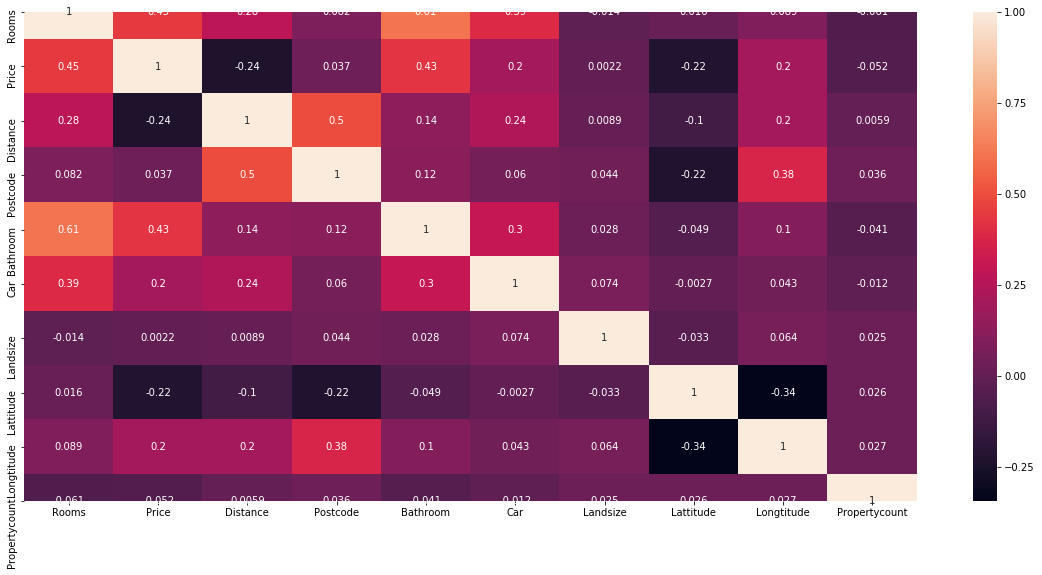

In [9]:
corr = df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

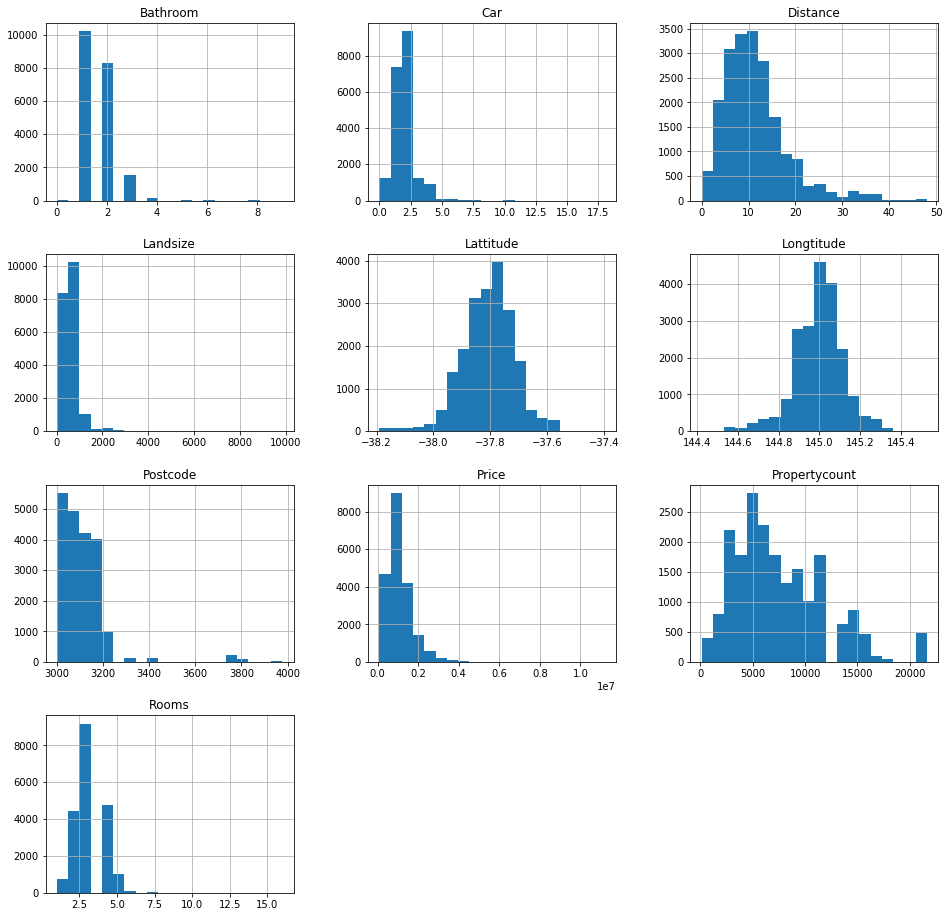

In [10]:
df.hist(bins=20,figsize=(16,16))
plt.show()

In [11]:
df.drop(["Address","Method","SellerG","Postcode","Date"],axis=1,inplace=True)#drop the coloumn in dataframe and inplace is use to final data frame drop the columns.

### Descriptive and exploratory analysis of Price


#### Price is our target variable and also the dependent variable for prediction. According to the assumptions of Linear Regression, data should be normally distributed. By checking the distribution of Price, we can decide if we need non-linear transformation, like log term, to make better prediction

Text(0.5, 0, 'Log SalePrice')

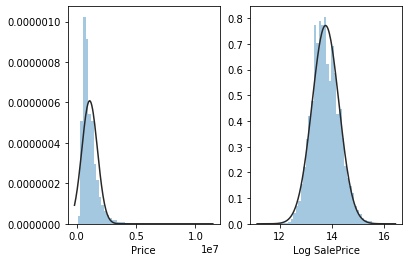

In [12]:
plt.subplot(1, 2, 1)
sns.distplot(df.Price, kde=False, fit = norm)
plt.subplot(1, 2, 2)
sns.distplot(np.log(df.Price), kde=False, fit = norm)
plt.xlabel('Log SalePrice')

## Preprocessing

#### Catagrial coloumn convert to number using the LabelEncoder¶


In [13]:
# our target variable is not normally distrubuted hence we use log transformation 

In [14]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
df=MultiColumnLabelEncoder(columns = ['Regionname','Suburb','Type','CouncilArea']).fit_transform(df)

In [15]:
df.head()

,Suburb,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,0,1480000,2.5,1,1,202.0,31,-37.7996,144.9984,2,4019
1,0,2,0,1035000,2.5,1,0,156.0,31,-37.8079,144.9934,2,4019
2,0,3,0,1465000,2.5,2,0,134.0,31,-37.8093,144.9944,2,4019
3,0,3,0,850000,2.5,2,1,94.0,31,-37.7969,144.9969,2,4019
4,0,4,0,1600000,2.5,1,2,120.0,31,-37.8072,144.9941,2,4019


#### Splitting dataset into two variables

In [16]:
X=df.drop(["Price"],axis=1)
X.head()

,Suburb,Rooms,Type,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,2,0,2.5,1,1,202.0,31,-37.7996,144.9984,2,4019
1,0,2,0,2.5,1,0,156.0,31,-37.8079,144.9934,2,4019
2,0,3,0,2.5,2,0,134.0,31,-37.8093,144.9944,2,4019
3,0,3,0,2.5,2,1,94.0,31,-37.7969,144.9969,2,4019
4,0,4,0,2.5,1,2,120.0,31,-37.8072,144.9941,2,4019


In [17]:
y=df["Price"]
y.head()

0    1480000
1    1035000
2    1465000
3     850000
4    1600000
Name: Price, dtype: int64

##### VIF(Vriance inflation factor)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20312 entries, 0 to 20311
Data columns (total 12 columns):
Suburb           20312 non-null int32
Rooms            20312 non-null int64
Type             20312 non-null int32
Distance         20312 non-null float64
Bathroom         20312 non-null int64
Car              20312 non-null int64
Landsize         20312 non-null float64
CouncilArea      20312 non-null int32
Lattitude        20312 non-null float64
Longtitude       20312 non-null float64
Regionname       20312 non-null int32
Propertycount    20312 non-null int64
dtypes: float64(4), int32(4), int64(4)
memory usage: 1.5 MB


In [24]:
X.shape[1]

12

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [27]:
[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

[4.108818265965647,
 26.397656498501323,
 1.988136158766735,
 4.494404134862883,
 10.14168011682866,
 5.005574859890593,
 2.390661219113475,
 3.057651532770861,
 261741.30914082436,
 260683.40021071682,
 5.736690693956677,
 4.069512908833256]

## Splitting dataset into train and test split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=1000)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.863
Model:                            OLS   Adj. R-squared (uncentered):              0.863
Method:                 Least Squares   F-statistic:                          1.065e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):                        0.00
Time:                        12:15:34   Log-Likelihood:                     -2.9415e+05
No. Observations:               20312   AIC:                                  5.883e+05
Df Residuals:                   20300   BIC:                                  5.884e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Suburb         -608.9606     35.825    -16.998      0.000    -679.182    -538.740
Rooms           1.71e+05   5290.387     32.321      0.000    1.61e+05    1.81e+05
Type          -2.399e+05   5380.213    -44.586      0.000    -2.5e+05   -2.29e+05
Distance      -4.314e+04    527.726    -81.740      0.000   -4.42e+04   -4.21e+04
Bathroom       2.346e+05   6033.413     38.886      0.000    2.23e+05    2.46e+05
Car            3.219e+04   3731.653      8.625      0.000    2.49e+04    3.95e+04
Landsize         58.8098      6.370      9.232      0.000      46.324      71.295
CouncilArea   -5607.9115    344.283    -16.289      0.000   -6282.733   -4933.090
Lattitude     -1.765e+06   4.47e+04    -39.454      0.000   -1.85e+06   -1.68e+06
Longtitude    -4.537e+05   1.16e+04    -38.980      0.000   -4.76e+05   -4.31e+05
Regionname    -2.076e+04   1877.291    -11.058      0.000   -2.44e+04   -1.71e+04
Propertycount     1.0131      0.765      1.324      0.185      -0.486       2.513
==============================================================================
Omnibus:                    13569.958   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           484962.783
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      26.312   Cond. No.                     1.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model fitting

#### Multiple linear Regression

In [30]:
mlr=LinearRegression()
mlr.fit(X_train,y_train)
y_pred=mlr.predict(X_test)
LR=mlr.score(X_test,y_test)
varL = explained_variance_score(y_pred,y_test)

In [31]:
mlr.score(X,y)

0.5381845625184116

In [32]:
varL


0.23256013158080846

#### Random forest

In [33]:
model = RandomForestRegressor(n_estimators=100,random_state=10)
model.fit(X_train,y_train)
RS=model.score(X_test,y_test)
pred = model.predict(X_test)
varR = explained_variance_score(pred,y_test)

In [34]:
RS

0.8243174866823405

In [35]:
AllScore=[["Linear",LR],["RandomForest",RS]]
AllScore

[['Linear', 0.5609432846618037], ['RandomForest', 0.8243174866823405]]

##### Using K fold cross validation

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
cross_val_score(RandomForestRegressor(n_estimators=80),X,y)

C:\Users\PankajR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.73150666, 0.78539924, 0.79203009])

#### Enseble learning

In [43]:

GB=GradientBoostingRegressor(n_estimators=100, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)


gradient=GB.score(X_test,y_test) 

pred = GB.predict(X_test)
varG = explained_variance_score(pred,y_test)
gradient

0.8278335126971601

In [59]:
AllScore=[["Linear Regression",LR],["RandomForest",RS],["GradientBoosting",gradient]]

In [60]:
df_accu = pd.DataFrame(AllScore, columns = ['Model', 'Accuracy'])

In [61]:
df_accu

,Model,Accuracy
0,Linear Regression,0.560943
1,RandomForest,0.824317
2,GradientBoosting,0.827834


### Autocorrelation

In [47]:
error=y_test-y_pred

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

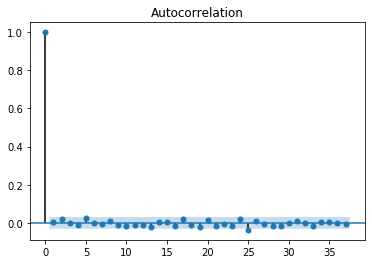

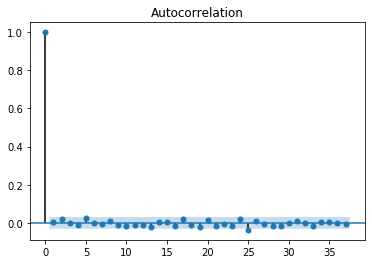

In [48]:
plot_acf(error)

#### Hence there no autocorelation among residuals

In [51]:
# Residuals are normally distributed?

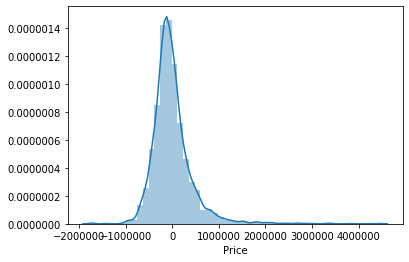

In [50]:
import seaborn as sns
sns.distplot(error)

#### yes. Residuals are normally distributed

#### Checking of homoskedasticity

In [52]:
import matplotlib.pyplot as plt

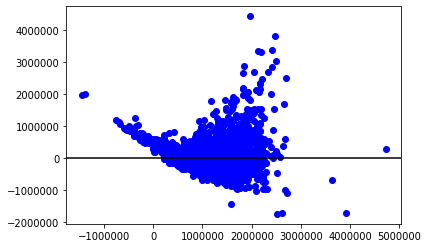

In [55]:
plt.plot(y_pred,error,'bo')
plt.axhline(y=0,color='k')